# **`Binary Classification`**

## **Install Packages**

In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential

In [3]:
from tensorflow.keras.datasets import imdb
(train_data, train_labels), (test_data, test_labels) = imdb.load_data( num_words=10000)

In [ ]:
###################### DATA PREPARATION ############################


# Data Preparation: Encoding the integer sequences into a binary matrix
import numpy as np
def vectorize_sequences(sequences, dimension=10000):
    # Create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# Our vectorized training data
x_train = vectorize_sequences(train_data)

# Our vectorized test data
x_test = vectorize_sequences(test_data)

# ---------------------------------------------------------------

# Here’s what the samples look like now:
# >>> x_train[0]
# array([ 0., 1., 1., ..., 0., 0., 0.])

# Our vectorized labels
y_train = np.asarray(train_labels).astype('float32')
y_test = np.asarray(test_labels).astype('float32')

# Now the data is ready to be fed into a neural network.

In [5]:
# Split the data into a training set and a validation set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]
y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [ ]:
model = Sequential()
model.add(Dense(16, activation='relu', input_shape=(10000,)))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='rmsprop',
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Train the model for 20 epochs - in mini-batches of 512 samples
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

history_dict = history.history
history_dict.keys()

Epoch 1/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 3s 46ms/step - accuracy: 0.6808 - loss: 0.5937 - val_accuracy: 0.8212 - val_loss: 0.4200
Epoch 2/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.8836 - loss: 0.3217 - val_accuracy: 0.8822 - val_loss: 0.3024
Epoch 3/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9275 - loss: 0.2253 - val_accuracy: 0.8901 - val_loss: 0.2768
Epoch 4/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - accuracy: 0.9433 - loss: 0.1769 - val_accuracy: 0.8691 - val_loss: 0.3185
Epoch 5/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9537 - loss: 0.1482 - val_accuracy: 0.8866 - val_loss: 0.2889
Epoch 6/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - accuracy: 0.9623 - loss: 0.1221 - val_accuracy: 0.8840 - val_loss: 0.2970
Epoch 7/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9717 - loss: 0.1026 - val_accuracy: 0.8823 - val_loss: 0.3082
Epoch 8/20
30/30 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9751 - loss: 0.0881 - val_accuracy: 0.8615 - v

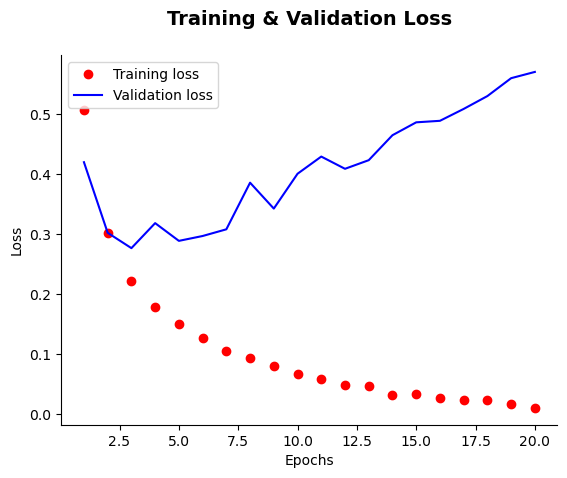

In [8]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
import seaborn as sns

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')           # 'ro' is for red dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      # 'b' is for solid blue line
plt.title('Training & Validation Loss\n', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

sns.despine(right=True, top=True)
plt.show()

> Bad

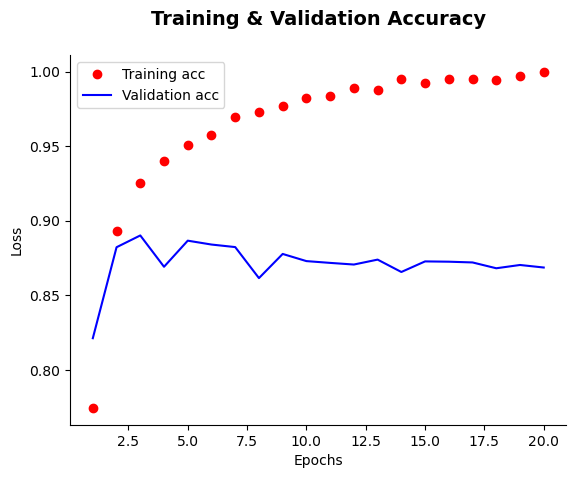

In [9]:
# Plotting the training and validation accuracy
plt.clf()   # clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & Validation Accuracy\n', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

sns.despine(right=True, top=True)
plt.show()

> The ideial point to stop training is at the 4/5th epoch, as the validation loss starts to increase after that point.


### **Observations**

- As you can see, the training loss decreases with every epoch, and the training accuracy increases with every epoch. But that isn’t the case for the validation loss and accuracy: they seem to peak at the fourth epoch.
- A model that performs better on the training data isn’t necessarily a model that will do better on data it has never seen before. In precise terms, what you’re seeing is overfitting.
- In this case, to prevent overfitting, you could stop training after three epochs. In general, you can use a range of techniques to mitigate overfitting.


---

In [10]:
# Result of the model
results = model.evaluate(x_test, y_test)
results

782/782 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.8516 - loss: 0.6359


[0.6236118078231812, 0.8551999926567078]

[0.6193017959594727, 0.858240008354187]

- **1st** element is the binary crossentropy in the validation set [*Scalar test loss*]
- **2nd** element is the accuracy of the model.

In [11]:
model.predict(x_test) # returns a list of predictions for our test data

782/782 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


array([[0.0151606 ],
       [1.        ],
       [0.15568684],
       ...,
       [0.00351728],
       [0.0039355 ],
       [0.7998118 ]], dtype=float32)

- $\approx 0 \rightarrow$ the model predicts 0
- $\approx 1 \rightarrow$ the model predicts 1
- $\approx 0.5 \rightarrow$ the model is unsure [Worst case]

> Como com **2 hidden layers** o modelo ficou overfitted, então temos de apenas usar **1 hidden layer**.

### **Take home messages**
- We usually need to do some preprocessingon your raw data in order to be able to feed it into a neural network.
- Stacks of Dense layers with reluactivations can solve a wide range of problems, and you’ll likely use them frequently.
- In a binary classification problem (two output classes), your network must end with a Dense layer with one unit and a sigmoid activation: the output of your network should be a scalar between 0 and 1, encoding a probability.
- With such a scalar sigmoid output on a binary classification problem, the loss function you must use is binary_crossentropy.
- The **`rmspropoptimizer`** is generally a good choice, whatever your problem. That’s one less thing for you to worry about.
- As they get better on their training data, neural networks eventually start overfitting and end up obtaining increasingly worse results on data they’ve never seen before. Be sure to always monitor performance on data that is outside of the training set.

---

# **`Multiclass Classification`**

In [ ]:
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras.datasets import reuters

(train_data, train_labels), (test_data, test_labels) = reuters.load_data(num_words=10000)

In [13]:
# Dimensionality of the data
len(train_data), len(test_data)

(8982, 2246)

In [14]:
# Vectorize the data
def vectorize_sequences(sequences, dimension=10000):
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.
    return results

x_train = vectorize_sequences(train_data)
x_test = vectorize_sequences(test_data)

In [15]:
# To vectorizethe labels we use one-hot encoding, a widely used format for categorical data, also called categorical encoding.
# def to_one_hot(labels, dimension=46):
#     results = np.zeros((len(labels), dimension))
#     for i, label in enumerate(labels):
#         results[i, label] = 1.
#     return results

# one_hot_train_labels = to_one_hot(train_labels)
# one_hot_test_labels = to_one_hot(test_labels)

In [16]:
# !pip install np_utils

In [18]:
# Note that there is a built-in way to do this in Keras:
from keras.utils import to_categorical

one_hot_train_labels = to_categorical(train_labels)
one_hot_test_labels = to_categorical(test_labels)

### **Building the Network**
- This topic-classification problem looks similar to the previous movie-review classification problem: in both cases, we’re trying to classify short snippets of text.
- But…the number of output classes has gone from 2 to 46. The dimensionality of the output space is much larger.
- In a stack of Denselayers like that we’ve been using, each layer can only access information present in the output of the previous layer.
- If one layer drops some information relevant to the classification problem, this information can never be recovered by later layers: each layer can potentially become an information bottleneck.

- In the previous example, we used 16-dimensional intermediate layers, but a 16-dimensional space may be too limited to learn to separate 46 different classes: such small layers may permanently drop relevant information.
- For this reason we’ll use larger layers. Let’s go with 64 units.

In [19]:
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10000))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))

c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [20]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
x_val = x_train[:1000]
partial_x_train = x_train[1000:]

y_val = one_hot_train_labels[:1000]
partial_y_train = one_hot_train_labels[1000:]

In [ ]:
# Train the model for 20 epochs - in mini-batches of 512 samples
history = model.fit(partial_x_train, partial_y_train, 
                    epochs=20, 
                    batch_size=512, 
                    validation_data=(x_val, y_val))

Epoch 1/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 2s 42ms/step - accuracy: 0.3698 - loss: 3.2192 - val_accuracy: 0.6120 - val_loss: 1.8423
Epoch 2/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.6490 - loss: 1.6419 - val_accuracy: 0.6800 - val_loss: 1.4109
Epoch 3/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.7313 - loss: 1.2468 - val_accuracy: 0.7210 - val_loss: 1.2189
Epoch 4/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.7833 - loss: 1.0112 - val_accuracy: 0.7530 - val_loss: 1.0930
Epoch 5/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - accuracy: 0.8162 - loss: 0.8567 - val_accuracy: 0.7710 - val_loss: 1.0348
Epoch 6/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8446 - loss: 0.7224 - val_accuracy: 0.7760 - val_loss: 1.0178
Epoch 7/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - accuracy: 0.8758 - loss: 0.5946 - val_accuracy: 0.8040 - val_loss: 0.9217
Epoch 8/20
16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - accuracy: 0.8951 - loss: 0.4880 - val_accuracy: 0.8120 - v

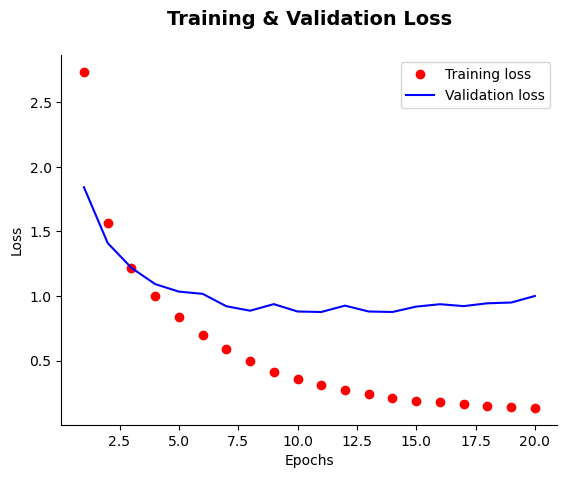

In [23]:
# Plotting the training and validation loss
import matplotlib.pyplot as plt
import seaborn as sns

history_dict = history.history
loss_values = history_dict['loss']
val_loss_values = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'ro', label='Training loss')           # 'ro' is for red dots
plt.plot(epochs, val_loss_values, 'b', label='Validation loss')      # 'b' is for solid blue line
plt.title('Training & Validation Loss\n', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

sns.despine(right=True, top=True)
plt.show()

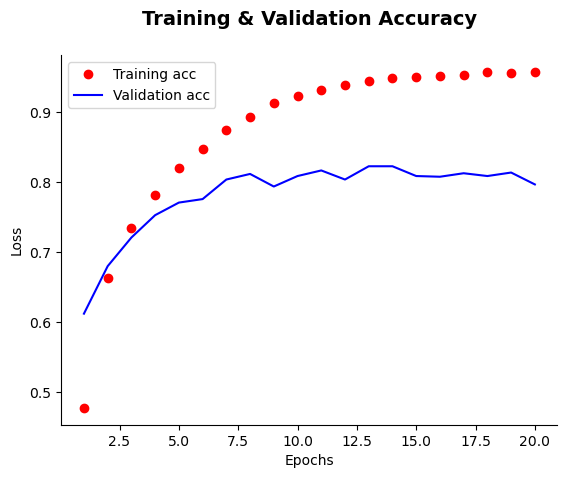

In [24]:
# Plotting the training and validation accuracy
plt.clf()   # clears the figure
acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']

plt.plot(epochs, acc, 'ro', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training & Validation Accuracy\n', fontsize=14, fontweight='bold')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

sns.despine(right=True, top=True)
plt.show()

### **Observations**
The network begins to overfitafter **9 epochs**. Let’s train a new network from scratch for **9 epochs** and then evaluate it on the test set.

```python
model = Sequential()
model.add(Dense(64, activation='relu', input_dim=10000))
model.add(Dense(64, activation='relu'))
model.add(Dense(46, activation='softmax'))
model.compile(optimizer='rmsprop',
loss='categorical_crossentropy',
metrics=['accuracy'])
model.fit(partial_x_train, partial_y_train, epochs=9, batch_size=512, validation_data=(x_val, y_val))
results = model.evaluate(x_test, one_hot_test_labels)
```

Here are the final results:

```python
results
[0.9565213431445807, 0.79697239536954589]
```

### **Generating predictions on new data**
You can verify that the predictmethod of the model instance returns a probability distribution over all 46 topics. Let’s generate topic predictions for all of the test data.

```python
predictions = model.predict(x_test)
Each entry in predictions is a vector of length 46:
>>> predictions[0].shape
(46,)
```

The coefficients in this vector sum to 1:
```python
>>> np.sum(predictions[0])
1.0
```


The largest entry is the predicted class—the class with the highest probability:
```python
>>> np.argmax(predictions[0])
4
```



---

# **`Regression`**

In [3]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model, Sequential

In [4]:
from keras.datasets import boston_housing

# Loading the Boston housing dataset
(train_data, train_targets), (test_data, test_targets) = boston_housing.load_data()

In [5]:
# Look at the data
train_data.shape

(404, 13)

In [6]:
test_data.shape

(102, 13)

In [7]:
# The targets are the median values of owner-occupied homes, in thousands of dollars:
train_targets[:10]

array([15.2, 42.3, 50. , 21.1, 17.7, 18.5, 11.3, 15.6, 15.6, 14.4])

> The prices are typically between $\$10000$ and $\$50000$. If that sounds cheap, remember that this was the mid-1970s, and these prices aren’t adjusted for inflation.

In [8]:
# ===================================== Data Preparation =====================================
# Normalization of the data
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)
train_data -= mean
train_data /= std
test_data -= mean
test_data /= std

# Note that the quantities used for normalizing the test data are computed using the
# training data. You should never use in your workflow any quantity computed on the
# test data, even for something as simple as data normalization.

In [9]:
# Building the Network

# Because so few samples are available, we’ll use a very small network with 2 hidden layers, each with 64 units.
# In general, the less training data you have, the worse overfitting will be, and using a small network is one way to mitigate overfitting.

# Model Creation 
def build_model():
    model = Sequential()
    model.add(Dense(64, activation='relu', input_shape=(train_data.shape[1],)))
    model.add(Dense(64, activation='relu'))
    model.add(Dense(1))

    model.compile(optimizer='rmsprop',
              loss='mse',
              metrics=['mae'])
    return model

# The network ends with a single unit and no activation(it will be a linear layer).
# This is a typical setup for scalar regression (a regression where you’re trying to predict a single continuous value).
# Applying an activation function would constrain the range the output can take; for instance, if you applied a sigmoid activation function to the last layer, the network could only learn to predict values between 0 and 1.
# Here, because the last layer is purely linear, the network is free to learn to predict values in any range.

### **Observations**
- Note that you compile the network with the mseloss function—mean squared error, the square of the difference between the predictions and the targets.
- This is a widely used loss function for regression problems.
- We’re also monitoring a new metric during training: mean absolute error (MAE). It’s the absolute value of the difference between the predictions and the targets.

In [15]:
# 4-fold Cross Validation (I show you this implementation to understand how CV works)	
all_mae_histories = []
	
k = 4
num_val_samples = len(train_data) // k
# num_epochs = 100
num_epochs = 500
all_scores = []

for i in range(k):
    print(f'Processing fold # {i}')
    val_data = train_data[i * num_val_samples: (i+1) * num_val_samples]
    val_targets = train_targets[i * num_val_samples: (i+1) * num_val_samples]
    
    partial_train_data = np.concatenate(
                            [train_data[:i * num_val_samples],
                            train_data[(i+1) * num_val_samples:]],
                            axis=0)
    partial_train_targets = np.concatenate(
                            [train_targets[:i * num_val_samples],
                            train_targets[(i+1)*num_val_samples:]],
                            axis=0)
    model = build_model()
    history = model.fit(partial_train_data,
              partial_train_targets,
              validation_data=(val_data, val_targets),
              epochs=num_epochs,
              batch_size=1,                                                                # batch_size=1 NUNCA USAR - Só usou para n perder tempo!!
              verbose=0)
    val_mse, val_mae = model.evaluate(val_data, val_targets, verbose=0)
    all_scores.append(val_mae)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)

	
# Here we print the scores
print(f'all_scores : {all_scores}')
print(f'mean all scores : {np.mean(all_scores)}')

# Here we compute the history of successive mean K-fold validation scores
average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

Processing fold # 0


c:\Anaconda3\envs\deeplearning\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Processing fold # 1
Processing fold # 2
Processing fold # 3
all_scores : [2.1478004455566406, 2.982947587966919, 2.6987407207489014, 2.5043931007385254]
mean all scores : 2.5834704637527466


In [16]:
history.history.keys()

dict_keys(['loss', 'mae', 'val_loss', 'val_mae'])

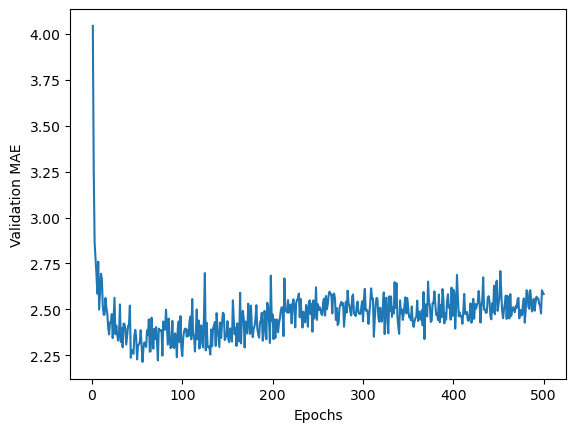

In [17]:
# Plotting validation scores
import matplotlib.pyplot as plt
plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

# It may be a little difficult to see the plot, due to scaling issues and relatively high variance.
# Let’s do the following:
# - Omit the first 10 data points, which are on a different scale than the rest of the curve.
# - Replace each point with an exponential moving average of the previous points, to obtain a smooth curve.

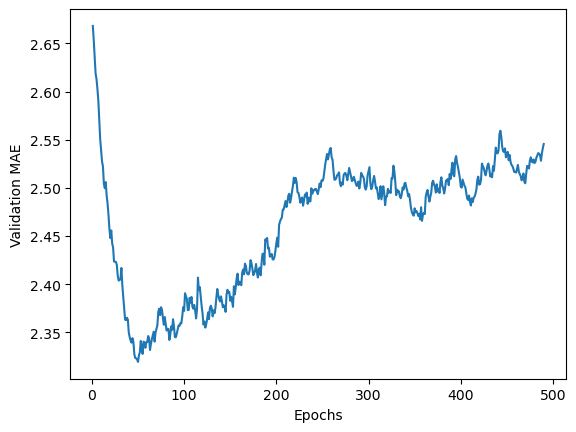

In [18]:
# Plotting validation scores, excluding the first 10 data points
def smooth_curve(points, factor=0.9):
    smoothed_points = []
    for point in points:
        if smoothed_points:
            previous = smoothed_points[-1]
            smoothed_points.append(previous * factor + point * (1 - factor))
        else:
            smoothed_points.append(point)
    return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1, len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()

In [19]:
# Comments
# According to this plot, validation MAE stops improving significantly after 80 epochs. Past that point, you start overfitting.
# Once you’re finished tuning other parameters of the model (in addition to the number of epochs, you could also adjust the size of the hidden layers), you can train a final production model on all of the training data, with the best parameters, and then look at its performance on the test data.

In [20]:
# Training the final model
model = build_model()
model.fit(train_data, train_targets, epochs=80, batch_size=16, verbose=0)
test_mse_score, test_mae_score = model.evaluate(test_data, test_targets)

print(f'Test MAE: {test_mae_score}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 13.3265 - mae: 2.5766
Test MAE: 2.7382614612579346


### **Take home messages**

- Regression is done using different loss functions than what we used for classification.
- Mean squared error (MSE) is a loss function commonly used for regression.
- Similarly, evaluation metrics to be used for regression differ from those used for classification; naturally, the concept of accuracy doesn’t apply for regression. A common regression metric is mean absolute error (MAE).
- When features in the input data have values in different ranges, each feature should be scaled independently as a preprocessing step.
- When there is little data available, using K-fold validation is a great way to reliably evaluate a model.
- When little training data is available, it’s preferable to use a small network with few hidden layers (typically only one or two), in order to avoid severe overfitting.

---

## **Summary**

- We’re now able to handle the most common kinds of machine-learning tasks on vector data: binary classification, multiclass classification, and regression.
- As training progresses, NNs eventually begin to overfitand obtain worse results on never-before-seen data.
- If you don’t have much training data, use a small network with only one or two hidden layers, to avoid severe overfitting.
- If your data is divided into many categories, you may cause information bottlenecks if you make the intermediate layers too small.
- Regression uses different loss functions and different evaluation metrics than classification.
- When you’re working with little data, K-fold validation can help evaluate your model.

---